# Coffea-Casa tHq Analysis

In [1]:
# Core libraries.
import glob
import os

# Analysis libraries.
import numpy as np
import awkward as ak
import coffea.processor as processor
from coffea.nanoevents import schemas

# Plotting libraries.
%matplotlib inline
import matplotlib.pyplot as plt
import hist
from hist import Hist

In [2]:
fileset = {'tHq': ['root://xcache//store/mc/RunIISummer16NanoAODv5/THQ_Hincl_13TeV-madgraph-pythia8_TuneCUETP8M1/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/100000/38E83594-51BD-7D46-B96D-620DD60078A7.root',
                    'root://xcache//store/mc/RunIISummer16NanoAODv5/THQ_Hincl_13TeV-madgraph-pythia8_TuneCUETP8M1/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/100000/3A3BA22C-AA71-2544-810A-6DF4C6BA96FC.root',
                    'root://xcache//store/mc/RunIISummer16NanoAODv5/THQ_Hincl_13TeV-madgraph-pythia8_TuneCUETP8M1/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/100000/3AFB1F42-BC6D-D44E-86FD-DB93C83F88FF.root',
                    'root://xcache//store/mc/RunIISummer16NanoAODv5/THQ_Hincl_13TeV-madgraph-pythia8_TuneCUETP8M1/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/100000/A37B4B7A-FB5B-484D-8577-40B860D77D23.root',
                    'root://xcache//store/mc/RunIISummer16NanoAODv5/THQ_Hincl_13TeV-madgraph-pythia8_TuneCUETP8M1/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/100000/E3C7548E-EE40-BA45-9130-17DF56FBE537.root',
                    'root://xcache//store/mc/RunIISummer16NanoAODv5/THQ_Hincl_13TeV-madgraph-pythia8_TuneCUETP8M1/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/100000/F9EFC559-09E9-BB48-8150-9AA8B7F02C1C.root'],
             'tHW': ['root://xcache//store/mc/RunIISummer16NanoAODv5/THW_Hincl_13TeV-madgraph-pythia8_TuneCUETP8M1/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/70000/2806293E-D1DD-4A49-A274-0CC3BA57BBDF.root',
                     'root://xcache//store/mc/RunIISummer16NanoAODv5/THW_Hincl_13TeV-madgraph-pythia8_TuneCUETP8M1/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/70000/2F19962E-1DFB-A14A-91C2-30B69D5651D3.root',
                     'root://xcache//store/mc/RunIISummer16NanoAODv5/THW_Hincl_13TeV-madgraph-pythia8_TuneCUETP8M1/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/70000/D9744111-ED04-3F47-A52A-C18424F01609.root',
                     'root://xcache//store/mc/RunIISummer16NanoAODv5/THW_Hincl_13TeV-madgraph-pythia8_TuneCUETP8M1/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/70000/E4CFA095-E7DB-B449-986D-1A5D21FD1D50.root'],
             'ttW': ['root://xcache//store/mc/RunIISummer16NanoAODv5/TTWJetsToLNu_TuneCUETP8M1_13TeV-amcatnloFXFX-madspin-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/30000/2E92C41D-6F94-F84B-A46B-61EDFFBEFE5B.root',
                     'root://xcache//store/mc/RunIISummer16NanoAODv5/TTWJetsToLNu_TuneCUETP8M1_13TeV-amcatnloFXFX-madspin-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/30000/69D60020-75AF-CA42-8D94-99957EEF71DC.root',
                     'root://xcache//store/mc/RunIISummer16NanoAODv5/TTWJetsToLNu_TuneCUETP8M1_13TeV-amcatnloFXFX-madspin-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/30000/AB62AEC8-6F15-1947-9E22-0059E196EBE5.root',
                     'root://xcache//store/mc/RunIISummer16NanoAODv5/TTWJetsToLNu_TuneCUETP8M1_13TeV-amcatnloFXFX-madspin-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/30000/EA538168-AF02-774C-9648-9BF72471384D.root',
                     'root://xcache//store/mc/RunIISummer16NanoAODv5/TTWJetsToLNu_TuneCUETP8M1_13TeV-amcatnloFXFX-madspin-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext2-v1/120000/2CF42572-162F-F14F-B7CA-96DABCD83589.root',
                     'root://xcache//store/mc/RunIISummer16NanoAODv5/TTWJetsToLNu_TuneCUETP8M1_13TeV-amcatnloFXFX-madspin-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext2-v1/120000/4B8C7791-6DFF-5748-B6AF-7FE0F6B5CA1D.root',
                     'root://xcache//store/mc/RunIISummer16NanoAODv5/TTWJetsToLNu_TuneCUETP8M1_13TeV-amcatnloFXFX-madspin-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext2-v1/120000/5BF4BF41-CFDB-F447-B034-D806DFE3252C.root',
                     'root://xcache//store/mc/RunIISummer16NanoAODv5/TTWJetsToLNu_TuneCUETP8M1_13TeV-amcatnloFXFX-madspin-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext2-v1/120000/794E6532-E576-FB41-A23F-CD078AABC85E.root',
                     'root://xcache//store/mc/RunIISummer16NanoAODv5/TTWJetsToLNu_TuneCUETP8M1_13TeV-amcatnloFXFX-madspin-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext2-v1/120000/8102B971-D215-004C-93EE-AE9A6C1907B3.root',
                     'root://xcache//store/mc/RunIISummer16NanoAODv5/TTWJetsToLNu_TuneCUETP8M1_13TeV-amcatnloFXFX-madspin-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext2-v1/120000/EF9DC33E-137A-0640-976B-8C3AC89F534E.root',
                     'root://xcache//store/mc/RunIISummer16NanoAODv5/TTWJetsToLNu_TuneCUETP8M1_13TeV-amcatnloFXFX-madspin-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext2-v1/120000/FF4BF1D3-A06A-0F44-8458-37984DEA5CAD.root'],
             'ttWJets': ['root://xcache//store/mc/RunIISummer16NanoAODv5/ttWJets_13TeV_madgraphMLM/NANOAODSIM/Nano1June2019_102X_mcRun2_asymptotic_v7-v1/250000/028BA117-69BE-B74D-9862-2170CA64B11C.root',
                         'root://xcache//store/mc/RunIISummer16NanoAODv5/ttWJets_13TeV_madgraphMLM/NANOAODSIM/Nano1June2019_102X_mcRun2_asymptotic_v7-v1/250000/1ABC137E-5233-044E-B3FE-8574DC6FC943.root',
                         'root://xcache//store/mc/RunIISummer16NanoAODv5/ttWJets_13TeV_madgraphMLM/NANOAODSIM/Nano1June2019_102X_mcRun2_asymptotic_v7-v1/250000/2274637A-76F8-4049-B651-F60817E6F775.root',
                         'root://xcache//store/mc/RunIISummer16NanoAODv5/ttWJets_13TeV_madgraphMLM/NANOAODSIM/Nano1June2019_102X_mcRun2_asymptotic_v7-v1/250000/2E4A4356-C68F-1B4C-A920-656C7F519328.root',
                         'root://xcache//store/mc/RunIISummer16NanoAODv5/ttWJets_13TeV_madgraphMLM/NANOAODSIM/Nano1June2019_102X_mcRun2_asymptotic_v7-v1/250000/3BEEC74F-9E73-1745-BCA2-09E2725C3979.root',
                         'root://xcache//store/mc/RunIISummer16NanoAODv5/ttWJets_13TeV_madgraphMLM/NANOAODSIM/Nano1June2019_102X_mcRun2_asymptotic_v7-v1/250000/80CEEF63-623A-8144-AEE6-0BAEB5BC314B.root',
                         'root://xcache//store/mc/RunIISummer16NanoAODv5/ttWJets_13TeV_madgraphMLM/NANOAODSIM/Nano1June2019_102X_mcRun2_asymptotic_v7-v1/250000/DA330C53-B0BE-A84F-9308-1BBBC38B095C.root',
                         'root://xcache//store/mc/RunIISummer16NanoAODv5/ttWJets_13TeV_madgraphMLM/NANOAODSIM/Nano1June2019_102X_mcRun2_asymptotic_v7-v1/250000/E3EE47DE-4DBB-FC48-84AB-4F9C26B9CCE8.root',
                         'root://xcache//store/mc/RunIISummer16NanoAODv5/ttWJets_13TeV_madgraphMLM/NANOAODSIM/Nano1June2019_102X_mcRun2_asymptotic_v7-v1/250000/F597371F-E866-6B47-A185-268F927E3372.root'],
            'ttZ': ['root://xcache//store/mc/RunIISummer16NanoAODv5/TTZToLLNuNu_M-10_TuneCUETP8M1_13TeV-amcatnlo-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/40000/5B1499CC-2B27-4F44-95BD-7B1C9907ACCD.root',
                    'root://xcache//store/mc/RunIISummer16NanoAODv5/TTZToLLNuNu_M-10_TuneCUETP8M1_13TeV-amcatnlo-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/40000/CDA99173-3C05-1A47-AE70-587B44E6348B.root',
                    'root://xcache//store/mc/RunIISummer16NanoAODv5/TTZToLLNuNu_M-10_TuneCUETP8M1_13TeV-amcatnlo-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/60000/28C6248C-D55F-8044-BDFB-696BAC0FE329.root',
                    'root://xcache//store/mc/RunIISummer16NanoAODv5/TTZToLLNuNu_M-10_TuneCUETP8M1_13TeV-amcatnlo-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/60000/F8A11DF6-4013-6F4C-BBE9-1759933FF20F.root',
                    'root://xcache//store/mc/RunIISummer16NanoAODv5/TTZToLLNuNu_M-10_TuneCUETP8M1_13TeV-amcatnlo-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext2-v1/110000/308939D7-DA54-E949-958D-7B495723DB4C.root',
                    'root://xcache//store/mc/RunIISummer16NanoAODv5/TTZToLLNuNu_M-10_TuneCUETP8M1_13TeV-amcatnlo-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext2-v1/110000/3A1F9F01-E4BC-A347-8D57-8DBFAA890EAB.root',
                    'root://xcache//store/mc/RunIISummer16NanoAODv5/TTZToLLNuNu_M-10_TuneCUETP8M1_13TeV-amcatnlo-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext2-v1/110000/BF1A0533-7A59-A04C-9A6C-6A5EA4697A06.root',
                    'root://xcache//store/mc/RunIISummer16NanoAODv5/TTZToLLNuNu_M-10_TuneCUETP8M1_13TeV-amcatnlo-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext2-v1/120000/191705EA-1891-6942-8CD2-CD70B0E58893.root',
                    'root://xcache//store/mc/RunIISummer16NanoAODv5/TTZToLLNuNu_M-10_TuneCUETP8M1_13TeV-amcatnlo-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext2-v1/120000/27BD2647-8A2F-7C45-964F-F0277A0A011D.root',
                    'root://xcache//store/mc/RunIISummer16NanoAODv5/TTZToLLNuNu_M-10_TuneCUETP8M1_13TeV-amcatnlo-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext2-v1/120000/56608BD3-2A0E-1941-8386-F498EEC16A61.root',
                    'root://xcache//store/mc/RunIISummer16NanoAODv5/TTZToLLNuNu_M-10_TuneCUETP8M1_13TeV-amcatnlo-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext2-v1/120000/7D898E0C-0752-B948-8BA7-7016BD151BD2.root',
                    'root://xcache//store/mc/RunIISummer16NanoAODv5/TTZToLLNuNu_M-10_TuneCUETP8M1_13TeV-amcatnlo-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext2-v1/120000/97637969-BD4B-0640-8158-17722CB9F631.root',
                    'root://xcache//store/mc/RunIISummer16NanoAODv5/TTZToLLNuNu_M-10_TuneCUETP8M1_13TeV-amcatnlo-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext2-v1/120000/9BEAB5BD-5C7E-B54A-B42E-D81FA4B30A2B.root',
                    'root://xcache//store/mc/RunIISummer16NanoAODv5/TTZToLLNuNu_M-10_TuneCUETP8M1_13TeV-amcatnlo-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext2-v1/120000/C7073B6B-C69E-1B42-B378-7FAC8FF4E856.root',
                    'root://xcache//store/mc/RunIISummer16NanoAODv5/TTZToLLNuNu_M-10_TuneCUETP8M1_13TeV-amcatnlo-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext2-v1/120000/FF986F85-71C4-064D-9759-B0C1ACAE9454.root',
                    'root://xcache//store/mc/RunIISummer16NanoAODv5/TTZToLLNuNu_M-10_TuneCUETP8M1_13TeV-amcatnlo-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext3-v1/130000/34275A2F-313A-6D4D-A7EC-DD18BF9C413B.root',
                    'root://xcache//store/mc/RunIISummer16NanoAODv5/TTZToLLNuNu_M-10_TuneCUETP8M1_13TeV-amcatnlo-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext3-v1/130000/392B4635-E8FF-924C-A5B5-51D19C670F69.root',
                    'root://xcache//store/mc/RunIISummer16NanoAODv5/TTZToLLNuNu_M-10_TuneCUETP8M1_13TeV-amcatnlo-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext3-v1/130000/4C139140-A677-AB49-9DF9-5BBF4FA850D2.root',
                    'root://xcache//store/mc/RunIISummer16NanoAODv5/TTZToLLNuNu_M-10_TuneCUETP8M1_13TeV-amcatnlo-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext3-v1/130000/80416EBE-074F-5C4A-AE5F-6403A9F9E9D9.root',
                    'root://xcache//store/mc/RunIISummer16NanoAODv5/TTZToLLNuNu_M-10_TuneCUETP8M1_13TeV-amcatnlo-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext3-v1/130000/96F276D6-1C38-9F4F-93CE-503B860AB550.root',
                    'root://xcache//store/mc/RunIISummer16NanoAODv5/TTZToLLNuNu_M-10_TuneCUETP8M1_13TeV-amcatnlo-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext3-v1/130000/A1AD2099-D5D6-7A47-AEB6-562F68B04441.root',
                    'root://xcache//store/mc/RunIISummer16NanoAODv5/TTZToLLNuNu_M-10_TuneCUETP8M1_13TeV-amcatnlo-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext3-v1/130000/AAD8B507-CEC2-CE44-9B23-822A451F426C.root'],
            'ttZJets': ['root://xcache//store/mc/RunIISummer16NanoAODv5/ttZJets_13TeV_madgraphMLM/NANOAODSIM/Nano1June2019_102X_mcRun2_asymptotic_v7-v1/40000/12857BB7-7239-B94A-A890-7CB3C79BD057.root',
                        'root://xcache//store/mc/RunIISummer16NanoAODv5/ttZJets_13TeV_madgraphMLM/NANOAODSIM/Nano1June2019_102X_mcRun2_asymptotic_v7-v1/40000/193EA450-873A-3047-BA69-3B1D1EABB771.root',
                        'root://xcache//store/mc/RunIISummer16NanoAODv5/ttZJets_13TeV_madgraphMLM/NANOAODSIM/Nano1June2019_102X_mcRun2_asymptotic_v7-v1/40000/21167A9A-2FDD-C240-AF27-FAA935B0057C.root',
                        'root://xcache//store/mc/RunIISummer16NanoAODv5/ttZJets_13TeV_madgraphMLM/NANOAODSIM/Nano1June2019_102X_mcRun2_asymptotic_v7-v1/40000/576C9504-E9B2-484C-88DB-1F087D4BA6A3.root',
                        'root://xcache//store/mc/RunIISummer16NanoAODv5/ttZJets_13TeV_madgraphMLM/NANOAODSIM/Nano1June2019_102X_mcRun2_asymptotic_v7-v1/40000/5C781945-9A98-7F44-B397-F806603C9A01.root',
                        'root://xcache//store/mc/RunIISummer16NanoAODv5/ttZJets_13TeV_madgraphMLM/NANOAODSIM/Nano1June2019_102X_mcRun2_asymptotic_v7-v1/40000/69E6121A-F0DC-8043-991A-049199E4BCC4.root',
                        'root://xcache//store/mc/RunIISummer16NanoAODv5/ttZJets_13TeV_madgraphMLM/NANOAODSIM/Nano1June2019_102X_mcRun2_asymptotic_v7-v1/40000/72EF6B33-D0AA-6540-BA4A-A760E8194589.root',
                        'root://xcache//store/mc/RunIISummer16NanoAODv5/ttZJets_13TeV_madgraphMLM/NANOAODSIM/Nano1June2019_102X_mcRun2_asymptotic_v7-v1/40000/8B2D64F4-D873-124B-AE6A-0503FF7A0427.root',
                        'root://xcache//store/mc/RunIISummer16NanoAODv5/ttZJets_13TeV_madgraphMLM/NANOAODSIM/Nano1June2019_102X_mcRun2_asymptotic_v7-v1/40000/B865F28C-D9B3-0944-8E01-D0D3B01C4F26.root',
                        'root://xcache//store/mc/RunIISummer16NanoAODv5/ttZJets_13TeV_madgraphMLM/NANOAODSIM/Nano1June2019_102X_mcRun2_asymptotic_v7-v1/40000/C2C66219-4FAA-4C4E-95FB-CA259749AAA4.root',
                        'root://xcache//store/mc/RunIISummer16NanoAODv5/ttZJets_13TeV_madgraphMLM/NANOAODSIM/Nano1June2019_102X_mcRun2_asymptotic_v7-v1/40000/DD8A6F4F-52CF-9142-B264-B402A94CFD09.root',
                        'root://xcache//store/mc/RunIISummer16NanoAODv5/ttZJets_13TeV_madgraphMLM/NANOAODSIM/Nano1June2019_102X_mcRun2_asymptotic_v7-v1/40000/E0D9AB84-E0BF-0C49-9B2E-E003587FF335.root'],
            'ttH': ['root://xcache//store/mc/RunIISummer16NanoAODv5/ttHJetToNonbb_M125_13TeV_amcatnloFXFX_madspin_pythia8_mWCutfix/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/100000/05371F7D-77DA-FD4E-BF1F-9C4B6C7B2BF4.root',
                    'root://xcache//store/mc/RunIISummer16NanoAODv5/ttHJetToNonbb_M125_13TeV_amcatnloFXFX_madspin_pythia8_mWCutfix/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/100000/1097F45B-C2CC-034A-98D5-6A2C38F9E957.root',
                    'root://xcache//store/mc/RunIISummer16NanoAODv5/ttHJetToNonbb_M125_13TeV_amcatnloFXFX_madspin_pythia8_mWCutfix/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/100000/144E050B-AC6C-5046-B9BF-3CB1045651D1.root',
                    'root://xcache//store/mc/RunIISummer16NanoAODv5/ttHJetToNonbb_M125_13TeV_amcatnloFXFX_madspin_pythia8_mWCutfix/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/100000/1F8A2052-DD4D-F24B-AEF7-C6C8DB5E42AC.root',
                    'root://xcache//store/mc/RunIISummer16NanoAODv5/ttHJetToNonbb_M125_13TeV_amcatnloFXFX_madspin_pythia8_mWCutfix/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/100000/2BDDFDC0-1D0E-4141-BCB6-98FDE981E522.root',
                    'root://xcache//store/mc/RunIISummer16NanoAODv5/ttHJetToNonbb_M125_13TeV_amcatnloFXFX_madspin_pythia8_mWCutfix/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/100000/3D3743BD-A2B7-F34E-BBD3-FE98A055B935.root',
                    'root://xcache//store/mc/RunIISummer16NanoAODv5/ttHJetToNonbb_M125_13TeV_amcatnloFXFX_madspin_pythia8_mWCutfix/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/100000/70319D0B-46D5-6840-9FA3-49B990C6E117.root',
                    'root://xcache//store/mc/RunIISummer16NanoAODv5/ttHJetToNonbb_M125_13TeV_amcatnloFXFX_madspin_pythia8_mWCutfix/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/100000/7CF51AAB-6C37-F84E-B091-48C8217EE65E.root',
                    'root://xcache//store/mc/RunIISummer16NanoAODv5/ttHJetToNonbb_M125_13TeV_amcatnloFXFX_madspin_pythia8_mWCutfix/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/100000/90463B9A-2AB6-1D4E-9D7F-4E6AA6B4500C.root',
                    'root://xcache//store/mc/RunIISummer16NanoAODv5/ttHJetToNonbb_M125_13TeV_amcatnloFXFX_madspin_pythia8_mWCutfix/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/100000/A922DC1E-905C-0240-81D7-8470159370D4.root',
                    'root://xcache//store/mc/RunIISummer16NanoAODv5/ttHJetToNonbb_M125_13TeV_amcatnloFXFX_madspin_pythia8_mWCutfix/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/100000/C6BD7A39-4592-F84F-99FB-52C1BBC3F066.root',
                    'root://xcache//store/mc/RunIISummer16NanoAODv5/ttHJetToNonbb_M125_13TeV_amcatnloFXFX_madspin_pythia8_mWCutfix/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/100000/EE7FEAE7-21B8-4547-A0C7-589B3DDA0704.root',
                    'root://xcache//store/mc/RunIISummer16NanoAODv5/ttHJetToNonbb_M125_13TeV_amcatnloFXFX_madspin_pythia8_mWCutfix/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/100000/F5A64CA8-059C-4D46-A2C4-9B679A4B911F.root',
                    'root://xcache//store/mc/RunIISummer16NanoAODv5/ttHJetToNonbb_M125_13TeV_amcatnloFXFX_madspin_pythia8_mWCutfix/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/120000/83CB02F7-FFA9-CD47-9EE6-4D444843595E.root'],
            'WZ': ['root://xcache//store/mc/RunIISummer16NanoAODv5/WZTo3LNu_TuneCUETP8M1_13TeV-powheg-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/120000/222071C0-CF04-1E4B-B65E-49D18B91DE8B.root',
                    'root://xcache//store/mc/RunIISummer16NanoAODv5/WZTo3LNu_TuneCUETP8M1_13TeV-powheg-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/120000/7EC09E9F-A061-6D46-83DB-E91A8479CD7A.root',
                    'root://xcache//store/mc/RunIISummer16NanoAODv5/WZTo3LNu_TuneCUETP8M1_13TeV-powheg-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/120000/9FA39757-C2AB-F34E-A2E8-3D728B605FD1.root',
                    'root://xcache//store/mc/RunIISummer16NanoAODv5/WZTo3LNu_TuneCUETP8M1_13TeV-powheg-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/120000/E539344F-0815-064E-BFB2-14D265A460FA.root',
                    'root://xcache//store/mc/RunIISummer16NanoAODv5/WZTo3LNu_TuneCUETP8M1_13TeV-powheg-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/110000/0571F847-7582-0D43-A65D-BB1DF150BE77.root',
                    'root://xcache//store/mc/RunIISummer16NanoAODv5/WZTo3LNu_TuneCUETP8M1_13TeV-powheg-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/110000/1875117C-8380-0C45-A701-B221443E9010.root',
                    'root://xcache//store/mc/RunIISummer16NanoAODv5/WZTo3LNu_TuneCUETP8M1_13TeV-powheg-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/110000/23490416-1F0E-364F-B5D9-7F7C92360277.root',
                    'root://xcache//store/mc/RunIISummer16NanoAODv5/WZTo3LNu_TuneCUETP8M1_13TeV-powheg-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/110000/423A6069-CE53-A94F-8D9F-75342F9F9273.root',
                    'root://xcache//store/mc/RunIISummer16NanoAODv5/WZTo3LNu_TuneCUETP8M1_13TeV-powheg-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/110000/42816FAA-2580-7146-93BE-C9482FC56E5F.root',
                    'root://xcache//store/mc/RunIISummer16NanoAODv5/WZTo3LNu_TuneCUETP8M1_13TeV-powheg-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/110000/4DCA8EC5-BC5C-3447-8A91-C21142F57775.root',
                    'root://xcache//store/mc/RunIISummer16NanoAODv5/WZTo3LNu_TuneCUETP8M1_13TeV-powheg-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/110000/4F6290B2-15A7-C840-8544-26FBA7D62129.root',
                    'root://xcache//store/mc/RunIISummer16NanoAODv5/WZTo3LNu_TuneCUETP8M1_13TeV-powheg-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/110000/62527AE1-E838-BF44-AA33-C145C74F2196.root',
                    'root://xcache//store/mc/RunIISummer16NanoAODv5/WZTo3LNu_TuneCUETP8M1_13TeV-powheg-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/110000/64F0D9CB-C675-3F49-ACE2-E06CD5CFFA13.root',
                    'root://xcache//store/mc/RunIISummer16NanoAODv5/WZTo3LNu_TuneCUETP8M1_13TeV-powheg-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/110000/669C5D12-E263-0E41-9F49-B277198FA882.root',
                    'root://xcache//store/mc/RunIISummer16NanoAODv5/WZTo3LNu_TuneCUETP8M1_13TeV-powheg-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/110000/788641E9-D641-0F40-AC0D-69E335F7E04D.root',
                    'root://xcache//store/mc/RunIISummer16NanoAODv5/WZTo3LNu_TuneCUETP8M1_13TeV-powheg-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/110000/A2DCB4B2-9A3B-6049-B845-8BC13C623736.root',
                    'root://xcache//store/mc/RunIISummer16NanoAODv5/WZTo3LNu_TuneCUETP8M1_13TeV-powheg-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/110000/B5189B28-6A9D-9240-A943-830C76F1C4CE.root',
                    'root://xcache//store/mc/RunIISummer16NanoAODv5/WZTo3LNu_TuneCUETP8M1_13TeV-powheg-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/110000/CFBDFA7E-FA6A-9E40-976A-5E2CAE843CE2.root',
                    'root://xcache//store/mc/RunIISummer16NanoAODv5/WZTo3LNu_TuneCUETP8M1_13TeV-powheg-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/110000/D52DFC49-0016-2941-BEB6-7958728B782E.root',
                    'root://xcache//store/mc/RunIISummer16NanoAODv5/WZTo3LNu_TuneCUETP8M1_13TeV-powheg-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/110000/DD34D24C-D3E4-6046-AA01-EDF356AC83CB.root',
                    'root://xcache//store/mc/RunIISummer16NanoAODv5/WZTo3LNu_TuneCUETP8M1_13TeV-powheg-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/110000/E4035DC3-ACD2-0440-805F-F8C46406E0A0.root',
                    'root://xcache//store/mc/RunIISummer16NanoAODv5/WZTo3LNu_TuneCUETP8M1_13TeV-powheg-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/110000/FED349E0-72BB-7E4F-B776-F9BB8C278B27.root'],
            'ZZ': ['root://xcache//store/mc/RunIISummer16NanoAODv5/ZZTo4L_13TeV_powheg_pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/30000/010B000A-0883-064B-B250-A6159DB2603A.root',
                    'root://xcache//store/mc/RunIISummer16NanoAODv5/ZZTo4L_13TeV_powheg_pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/30000/1B4E5034-DD6A-DB40-882D-20B5C42A9722.root',
                    'root://xcache//store/mc/RunIISummer16NanoAODv5/ZZTo4L_13TeV_powheg_pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/30000/462F4643-6F37-EA42-8F6C-90B91C23A731.root',
                    'root://xcache//store/mc/RunIISummer16NanoAODv5/ZZTo4L_13TeV_powheg_pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/30000/465A6EA9-E768-E642-8A73-B27E21BD3595.root',
                    'root://xcache//store/mc/RunIISummer16NanoAODv5/ZZTo4L_13TeV_powheg_pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/30000/46E99F08-CB4C-914F-9CF0-1A9E7DCE8081.root',
                    'root://xcache//store/mc/RunIISummer16NanoAODv5/ZZTo4L_13TeV_powheg_pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/30000/73D0D73F-E72D-E649-8772-2BECC3D296D7.root',
                    'root://xcache//store/mc/RunIISummer16NanoAODv5/ZZTo4L_13TeV_powheg_pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/30000/773BDDB0-D100-DA4B-8522-17EB71265BEE.root',
                    'root://xcache//store/mc/RunIISummer16NanoAODv5/ZZTo4L_13TeV_powheg_pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/30000/D08D925B-BA30-3642-9995-F165FC2542D7.root',
                    'root://xcache//store/mc/RunIISummer16NanoAODv5/ZZTo4L_13TeV_powheg_pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/30000/DC582D74-81EF-504C-8342-08D42BB17C38.root',
                    'root://xcache//store/mc/RunIISummer16NanoAODv5/ZZTo4L_13TeV_powheg_pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/30000/FD274208-7DF0-3245-945F-87B17415142E.root'],
            'ZZZ': ['root://xcache//store/mc/RunIISummer16NanoAODv5/ZZZ_TuneCUETP8M1_13TeV-amcatnlo-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/250000/37FA68CC-B841-7D41-994C-645CFA4BA227.root'],
            'WWZ': ['root://xcache//store/mc/RunIISummer16NanoAODv5/WWZ_TuneCUETP8M1_13TeV-amcatnlo-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/70000/8034D852-4E18-F441-B1B7-3A4BA82B8963.root',
                    'root://xcache//store/mc/RunIISummer16NanoAODv5/WWZ_TuneCUETP8M1_13TeV-amcatnlo-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/70000/EE791322-C349-A14A-B49A-75BDAA03482E.root'],
            'WZZ': ['root://xcache//store/mc/RunIISummer16NanoAODv5/WZZ_TuneCUETP8M1_13TeV-amcatnlo-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/100000/4359B067-2773-4D48-A235-CD33C3A20AD9.root',
                    'root://xcache//store/mc/RunIISummer16NanoAODv5/WZZ_TuneCUETP8M1_13TeV-amcatnlo-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/100000/50D0F171-4A01-644A-A1D9-6BF1D915DF2A.root',
                    'root://xcache//store/mc/RunIISummer16NanoAODv5/WZZ_TuneCUETP8M1_13TeV-amcatnlo-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/100000/61EDBB45-0A24-1847-9FD6-222D7D8D6AF3.root'],
            'tttt': ['root://xcache//store/mc/RunIISummer16NanoAODv5/TTTT_TuneCUETP8M1_13TeV-amcatnlo-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/250000/E23424C4-B553-114D-A9F2-9E2F21D641F6.root',
                    'root://xcache//store/mc/RunIISummer16NanoAODv5/TTTT_TuneCUETP8M1_13TeV-amcatnlo-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/250000/ED3B459F-A945-C847-9B80-B847C3487049.root'],
            'WpWp': ['root://xcache//store/mc/RunIISummer16NanoAODv5/WpWpJJ_EWK-QCD_TuneCUETP8M1_13TeV-madgraph-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/120000/025F6345-BE37-DF45-B582-25EA8300B4E8.root'],
            'WGToLNuG': ['root://xcache//store/mc/RunIISummer16NanoAODv5/WGToLNuG_TuneCUETP8M1_13TeV-madgraphMLM-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/60000/1C9A5B42-59F6-BE46-B6A5-FCFBB332800D.root',
                        'root://xcache//store/mc/RunIISummer16NanoAODv5/WGToLNuG_TuneCUETP8M1_13TeV-madgraphMLM-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/60000/3EDF906E-8031-134B-A90B-A4D514534E2C.root',
                        'root://xcache//store/mc/RunIISummer16NanoAODv5/WGToLNuG_TuneCUETP8M1_13TeV-madgraphMLM-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/60000/4A38A79D-C3E8-6642-A769-DF7DFD1EB5F8.root',
                        'root://xcache//store/mc/RunIISummer16NanoAODv5/WGToLNuG_TuneCUETP8M1_13TeV-madgraphMLM-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/60000/8F31680D-1759-5A41-9B6C-0BC14DCC2DCB.root',
                        'root://xcache//store/mc/RunIISummer16NanoAODv5/WGToLNuG_TuneCUETP8M1_13TeV-madgraphMLM-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/60000/D5C66F81-4B6F-B147-9E14-65B72102C938.root'],
            'ZGTo2LG': ['root://xcache//store/mc/RunIISummer16NanoAODv5/ZGTo2LG_TuneCUETP8M1_13TeV-amcatnloFXFX-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/260000/00169085-1173-174A-88D7-DF8C05E63B86.root',
                        'root://xcache//store/mc/RunIISummer16NanoAODv5/ZGTo2LG_TuneCUETP8M1_13TeV-amcatnloFXFX-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/260000/0D5754A1-90DD-C44D-8F22-C4D1D25DC8C6.root',
                        'root://xcache//store/mc/RunIISummer16NanoAODv5/ZGTo2LG_TuneCUETP8M1_13TeV-amcatnloFXFX-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/260000/21184738-5366-7544-BEC1-F6A553821938.root',
                        'root://xcache//store/mc/RunIISummer16NanoAODv5/ZGTo2LG_TuneCUETP8M1_13TeV-amcatnloFXFX-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/260000/33FB9844-B072-3046-9499-DA3AB42E1D2D.root',
                        'root://xcache//store/mc/RunIISummer16NanoAODv5/ZGTo2LG_TuneCUETP8M1_13TeV-amcatnloFXFX-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/260000/4970C91E-D60F-6B42-A55C-20569AFAA431.root',
                        'root://xcache//store/mc/RunIISummer16NanoAODv5/ZGTo2LG_TuneCUETP8M1_13TeV-amcatnloFXFX-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/260000/701DFC56-C64E-2449-A765-3BCEF02B991D.root',
                        'root://xcache//store/mc/RunIISummer16NanoAODv5/ZGTo2LG_TuneCUETP8M1_13TeV-amcatnloFXFX-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/260000/8217CFFF-03A7-7E4D-8C1A-8C0EA798BD82.root',
                        'root://xcache//store/mc/RunIISummer16NanoAODv5/ZGTo2LG_TuneCUETP8M1_13TeV-amcatnloFXFX-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/260000/91A1637B-CDE3-F940-96D2-E557F3E20F7E.root',
                        'root://xcache//store/mc/RunIISummer16NanoAODv5/ZGTo2LG_TuneCUETP8M1_13TeV-amcatnloFXFX-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/260000/9CAA7F23-A5E5-DB40-A776-068209875DDA.root',
                        'root://xcache//store/mc/RunIISummer16NanoAODv5/ZGTo2LG_TuneCUETP8M1_13TeV-amcatnloFXFX-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/260000/B2D94295-780F-AA4C-9A98-FB682EC1F910.root',
                        'root://xcache//store/mc/RunIISummer16NanoAODv5/ZGTo2LG_TuneCUETP8M1_13TeV-amcatnloFXFX-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/260000/B53D3104-B052-F24D-ADF2-9026402AFDA8.root',
                        'root://xcache//store/mc/RunIISummer16NanoAODv5/ZGTo2LG_TuneCUETP8M1_13TeV-amcatnloFXFX-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/260000/D8B42B2C-1BAA-0F4D-88E8-F03E23CD3701.root',
                        'root://xcache//store/mc/RunIISummer16NanoAODv5/ZGTo2LG_TuneCUETP8M1_13TeV-amcatnloFXFX-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/260000/EAD6568E-3035-3A4C-99A9-10F6635C1000.root',
                        'root://xcache//store/mc/RunIISummer16NanoAODv5/ZGTo2LG_TuneCUETP8M1_13TeV-amcatnloFXFX-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/260000/EB5065C4-7B33-9A4F-AF54-B80EFF266AC2.root',
                        'root://xcache//store/mc/RunIISummer16NanoAODv5/ZGTo2LG_TuneCUETP8M1_13TeV-amcatnloFXFX-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/260000/EDAA08F5-3220-424F-8036-2259BDC63179.root',
                        'root://xcache//store/mc/RunIISummer16NanoAODv5/ZGTo2LG_TuneCUETP8M1_13TeV-amcatnloFXFX-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/260000/F2CAD07A-CA17-B645-B364-0E9CB98715B8.root'],
            'TGJets': ['root://xcache//store/mc/RunIISummer16NanoAODv5/TGJets_TuneCUETP8M1_13TeV_amcatnlo_madspin_pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/240000/634ABFF2-03BF-ED48-90CF-1ED79CAEECC2.root',
                        'root://xcache//store/mc/RunIISummer16NanoAODv5/TGJets_TuneCUETP8M1_13TeV_amcatnlo_madspin_pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/240000/999FCE98-7A19-1F4D-99C4-B055C58887DC.root',
                        'root://xcache//store/mc/RunIISummer16NanoAODv5/TGJets_TuneCUETP8M1_13TeV_amcatnlo_madspin_pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/240000/CD355648-3704-FB45-8F3B-125E390C0AEC.root',
                        'root://xcache//store/mc/RunIISummer16NanoAODv5/TGJets_TuneCUETP8M1_13TeV_amcatnlo_madspin_pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/250000/00C95E31-FFBA-4C42-8603-066FAB92542A.root'],
            'TTGJets': ['root://xcache//store/mc/RunIISummer16NanoAODv5/TTGJets_TuneCUETP8M1_13TeV-amcatnloFXFX-madspin-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/250000/22881651-BBF4-4E49-9000-CB054643A04E.root',
                        'root://xcache//store/mc/RunIISummer16NanoAODv5/TTGJets_TuneCUETP8M1_13TeV-amcatnloFXFX-madspin-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/250000/3DA57B87-3A1E-E340-B465-1B6DA3278FBA.root',
                        'root://xcache//store/mc/RunIISummer16NanoAODv5/TTGJets_TuneCUETP8M1_13TeV-amcatnloFXFX-madspin-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/250000/4588AAE8-B596-DA49-834B-046CC2565897.root',
                        'root://xcache//store/mc/RunIISummer16NanoAODv5/TTGJets_TuneCUETP8M1_13TeV-amcatnloFXFX-madspin-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/250000/5DAC0107-F368-FE49-A2D6-902CB848CB63.root',
                        'root://xcache//store/mc/RunIISummer16NanoAODv5/TTGJets_TuneCUETP8M1_13TeV-amcatnloFXFX-madspin-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/250000/8DA9E6B2-789A-B740-9F97-C18ADA0A56D0.root',
                        'root://xcache//store/mc/RunIISummer16NanoAODv5/TTGJets_TuneCUETP8M1_13TeV-amcatnloFXFX-madspin-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/250000/A2AC3FF8-8A99-054D-9FAA-B8742C4D2508.root',
                        'root://xcache//store/mc/RunIISummer16NanoAODv5/TTGJets_TuneCUETP8M1_13TeV-amcatnloFXFX-madspin-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/250000/A38A9608-2268-0D43-92AE-32DD986767FB.root',
                        'root://xcache//store/mc/RunIISummer16NanoAODv5/TTGJets_TuneCUETP8M1_13TeV-amcatnloFXFX-madspin-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/250000/B0718C55-B1E7-6148-885E-12323306D998.root',
                        'root://xcache//store/mc/RunIISummer16NanoAODv5/TTGJets_TuneCUETP8M1_13TeV-amcatnloFXFX-madspin-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/250000/B479B885-9336-5645-AC4E-233CAD65FE30.root',
                        'root://xcache//store/mc/RunIISummer16NanoAODv5/TTGJets_TuneCUETP8M1_13TeV-amcatnloFXFX-madspin-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/250000/B486E2A0-1FEF-7F4C-8E33-7D8D32378206.root',
                        'root://xcache//store/mc/RunIISummer16NanoAODv5/TTGJets_TuneCUETP8M1_13TeV-amcatnloFXFX-madspin-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/250000/BAD51EE9-58C2-DF4D-B937-3694B4D42783.root',
                        'root://xcache//store/mc/RunIISummer16NanoAODv5/TTGJets_TuneCUETP8M1_13TeV-amcatnloFXFX-madspin-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/250000/CD4456D4-22C1-7942-8F71-C0443FEADBC2.root',
                        'root://xcache//store/mc/RunIISummer16NanoAODv5/TTGJets_TuneCUETP8M1_13TeV-amcatnloFXFX-madspin-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/250000/EBC0FD8D-565D-0A44-B2DE-AFC80D2D4C7D.root',
                        'root://xcache//store/mc/RunIISummer16NanoAODv5/TTGJets_TuneCUETP8M1_13TeV-amcatnloFXFX-madspin-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext1-v1/250000/F84B0880-61E2-0C4B-BA45-4483B6D1ED27.root',
                        'root://xcache//store/mc/RunIISummer16NanoAODv5/TTGJets_TuneCUETP8M1_13TeV-amcatnloFXFX-madspin-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/250000/046AFA0D-DA2F-7C4F-81AD-668616A5A08A.root',
                        'root://xcache//store/mc/RunIISummer16NanoAODv5/TTGJets_TuneCUETP8M1_13TeV-amcatnloFXFX-madspin-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/250000/2F8FAEDA-96E0-E948-A5DF-12B25149DBFA.root',
                        'root://xcache//store/mc/RunIISummer16NanoAODv5/TTGJets_TuneCUETP8M1_13TeV-amcatnloFXFX-madspin-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/250000/6969756B-8B3D-C445-98EC-B2AB93043443.root',
                        'root://xcache//store/mc/RunIISummer16NanoAODv5/TTGJets_TuneCUETP8M1_13TeV-amcatnloFXFX-madspin-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/250000/A714BF72-C90E-3B4B-AD81-C66F2B0FBDCB.root',
                        'root://xcache//store/mc/RunIISummer16NanoAODv5/TTGJets_TuneCUETP8M1_13TeV-amcatnloFXFX-madspin-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/250000/BFA217F6-B261-8B44-9261-E09C97E6E286.root',
                        'root://xcache//store/mc/RunIISummer16NanoAODv5/TTGJets_TuneCUETP8M1_13TeV-amcatnloFXFX-madspin-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/250000/C4551934-5EBD-3C4C-AE80-AC2F6F6E12CD.root',
                        'root://xcache//store/mc/RunIISummer16NanoAODv5/TTGJets_TuneCUETP8M1_13TeV-amcatnloFXFX-madspin-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/250000/EA5D2DC1-38B4-914E-B3FF-308FD4A24B94.root',
                        'root://xcache//store/mc/RunIISummer16NanoAODv5/TTGJets_TuneCUETP8M1_13TeV-amcatnloFXFX-madspin-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/250000/ECA16C69-E6C8-794C-A3D6-D01EBB5E1922.root']
          }

In [3]:
class SignalProcessor(processor.ProcessorABC):
    def __init__(self):
        # # # # # # # # # # # #
        # PHYSICAL CONSTANTS  #
        # # # # # # # # # # # #
        self.loose_wp = 0.5425
        self.medium_wp = 0.8484
        
        self.lum = 35900
        self.xsecs = {'tHq': 0.7927,
                         'tHw': 0.1472,
                         'ttW': 0.6105,
                         'ttWJets': 0.2043,
                         'ttZ': 0.2520,
                         'ttZJets': 0.5297,
                         'ttH': 0.2151,
                         'WZ': 4.4296,
                         'ZZ': 1.256,
                         'ZZZ': 0.01398,
                         'WWZ': 0.1651,
                         'WZZ': 0.05565,
                         'tttt': 0.009103,
                         'WpWp': 0.03711,
                         }
        
        # # # # # # # # #
        # HIST CREATION #
        # # # # # # # # #
        
        # First, create bins and categories. We want to split each bin up by dataset (the category).
        self.dataset_axis = hist.axis.StrCategory(name="dataset", label="", categories=[], growth=True)
        
        # Depending on the type of event, we want different data. We create four lepton channels, organized as a dictionary (histos) of dictionaries (channels).
        self.bins = {'lll': {}, 'mumu': {}, 'emu': {}, 'ee': {}}
        ## Three-lepton channel.
        self.bins['lll']['subleadLepton_pT'] = hist.axis.Regular(name="lll_subleadLepton_pT", label="Sub-leading Lepton $p_T$ [GeV]", bins=18, start=0, stop=90)
        self.bins['lll']['fwdJet_leadbJet'] = hist.axis.Regular(name="lll_fwdJet_leadbJet", label="$\Delta \eta$ max fwd jet and leading bjet", bins=18, start=0, stop=6)
        self.bins['lll']['fwdJet_subleadbJet'] = hist.axis.Regular(name="lll_fwdJet_subleadbJet", label="$\Delta \eta$ max fwd jet and sub-leading bjet", bins=18, start=0, stop=6)
        self.bins['lll']['fwdJet_closestLepton'] = hist.axis.Regular(name="lll_fwdJet_closestLepton", label="$\Delta \eta$ max fwd jet and closest lepton", bins=18, start=0, stop=6)
        self.bins['lll']['highpT_sslp'] = hist.axis.Regular(name="lll_highpT_sslp", label="$\Delta \Phi$ highest $p_T$ same-sign lepton pair", bins=18, start=0, stop=3.5)
        self.bins['lll']['jetMaxEta'] = hist.axis.Regular(name="lll_jetMaxEta", label="max jet $|\eta|$ ($p_T$ > 25)", bins=18, start=0, stop=5)
        self.bins['lll']['minDelR'] = hist.axis.Regular(name="lll_minDelR", label="Minimum $\Delta$ R between any two leptons", bins=18, start=0, stop=4)
        self.bins['lll']['nJet25'] = hist.axis.Regular(name="lll_nJet25", label="N(jet, $p_T$ > 25, $|\eta|$ < 2.4)", bins=6, start=2, stop=8)
        self.bins['lll']['nJetEta1'] = hist.axis.Regular(name="lll_nJetEta1", label="N(jet, $|\eta|$ > 1) non CSV medium", bins=7, start=1, stop=8)        
        self.bins['lll']['TotalCharge'] = hist.axis.Regular(name="lll_TotalCharge", label="Total Lepton Charge", bins=5, start=-2, stop=3)
        ## Two-muon channel.
        self.bins['mumu']['subleadLepton_pT'] = hist.axis.Regular(name="mumu_subleadLepton_pT", label="Sub-leading Lepton $p_T$ [GeV]", bins=18, start=0, stop=144)
        self.bins['mumu']['fwdJet_leadbJet'] = hist.axis.Regular(name="mumu_fwdJet_leadbJet", label="$\Delta \eta$ max fwd jet and leading bjet", bins=18, start=0, stop=6)
        self.bins['mumu']['fwdJet_subleadbJet'] = hist.axis.Regular(name="mumu_fwdJet_subleadbJet", label="$\Delta \eta$ max fwd jet and sub-leading bjet", bins=18, start=0, stop=6)
        self.bins['mumu']['fwdJet_closestLepton'] = hist.axis.Regular(name="mumu_fwdJet_closestLepton", label="$\Delta \eta$ max fwd jet and closest lepton", bins=18, start=0, stop=6)
        self.bins['mumu']['highpT_sslp'] = hist.axis.Regular(name="mumu_highpT_sslp", label="$\Delta \Phi$ highest $p_T$ same-sign lepton pair", bins=18, start=0, stop=3.5)
        self.bins['mumu']['jetMaxEta'] = hist.axis.Regular(name="mumu_jetMaxEta", label="max jet $|\eta|$ ($p_T$ > 40)", bins=18, start=0, stop=5)
        self.bins['mumu']['minDelR'] = hist.axis.Regular(name="mumu_minDelR", label="Minimum $\Delta$ R between any two leptons", bins=18, start=0, stop=4)
        self.bins['mumu']['nJet25'] = hist.axis.Regular(name="mumu_nJet25", label="N(jet, $p_T$ > 25, $|\eta|$ < 2.4)", bins=6, start=2, stop=8)
        self.bins['mumu']['nJetEta1'] = hist.axis.Regular(name="mumu_nJetEta1", label="N(jet, $|\eta|$ > 1) non CSV medium", bins=7, start=1, stop=8)        
        self.bins['mumu']['TotalCharge'] = hist.axis.Regular(name="mumu_TotalCharge", label="Total Lepton Charge", bins=5, start=-2, stop=3)
        ## Electron-muon channel.
        self.bins['emu']['subleadLepton_pT'] = hist.axis.Regular(name="emu_subleadLepton_pT", label="Sub-leading Lepton $p_T$ [GeV]", bins=18, start=0, stop=144)
        self.bins['emu']['fwdJet_leadbJet'] = hist.axis.Regular(name="emu_fwdJet_leadbJet", label="$\Delta \eta$ max fwd jet and leading bjet", bins=18, start=0, stop=6)
        self.bins['emu']['fwdJet_subleadbJet'] = hist.axis.Regular(name="emu_fwdJet_subleadbJet", label="$\Delta \eta$ max fwd jet and sub-leading bjet", bins=18, start=0, stop=6)
        self.bins['emu']['fwdJet_closestLepton'] = hist.axis.Regular(name="emu_fwdJet_closestLepton", label="$\Delta \eta$ max fwd jet and closest lepton", bins=18, start=0, stop=6)
        self.bins['emu']['highpT_sslp'] = hist.axis.Regular(name="emu_highpT_sslp", label="$\Delta \Phi$ highest $p_T$ same-sign lepton pair", bins=18, start=0, stop=3.5)
        self.bins['emu']['jetMaxEta'] = hist.axis.Regular(name="emu_jetMaxEta", label="max jet $|\eta|$ ($p_T$ > 40)", bins=18, start=0, stop=5)
        self.bins['emu']['minDelR'] = hist.axis.Regular(name="emu_minDelR", label="Minimum $\Delta$ R between any two leptons", bins=18, start=0, stop=4)
        self.bins['emu']['nJet25'] = hist.axis.Regular(name="emu_nJet25", label="N(jet, $p_T$ > 25, $|\eta|$ < 2.4)", bins=6, start=2, stop=8)
        self.bins['emu']['nJetEta1'] = hist.axis.Regular(name="emu_nJetEta1", label="N(jet, $|\eta|$ > 1) non CSV medium", bins=7, start=1, stop=8)        
        self.bins['emu']['TotalCharge'] = hist.axis.Regular(name="emu_TotalCharge", label="Total Lepton Charge", bins=5, start=-2, stop=3)
        ## Two-electron channel.
        self.bins['ee']['subleadLepton_pT'] = hist.axis.Regular(name="ee_subleadLepton_pT", label="Sub-leading lepton $p_T$ [GeV]", bins=18, start=0, stop=144)
        self.bins['ee']['fwdJet_leadbJet'] = hist.axis.Regular(name="ee_fwdJet_leadbJet", label="$\Delta \eta$ max fwd jet and leading bjet", bins=18, start=0, stop=6)
        self.bins['ee']['fwdJet_subleadbJet'] = hist.axis.Regular(name="ee_fwdJet_subleadbJet", label="$\Delta \eta$ max fwd jet and sub-leading bjet", bins=18, start=0, stop=6)
        self.bins['ee']['fwdJet_closestLepton'] = hist.axis.Regular(name="ee_fwdJet_closestLepton", label="$\Delta \eta$ max fwd jet and closest lepton", bins=18, start=0, stop=6)
        self.bins['ee']['highpT_sslp'] = hist.axis.Regular(name="ee_highpT_sslp", label="$\Delta \Phi$ highest $p_T$ same-sign lepton pair", bins=18, start=0, stop=3.5)
        self.bins['ee']['jetMaxEta'] = hist.axis.Regular(name="ee_jetMaxEta", label="max jet $|\eta|$ ($p_T$ > 40)", bins=18, start=0, stop=5)
        self.bins['ee']['minDelR'] = hist.axis.Regular(name="ee_minDelR", label="Minimum $\Delta$ R between any two leptons", bins=18, start=0, stop=4)
        self.bins['ee']['nJet25'] = hist.axis.Regular(name="ee_nJet25", label="N(jet, $p_T$ > 25, $|\eta|$ < 2.4)", bins=6, start=2, stop=8)
        self.bins['ee']['nJetEta1'] = hist.axis.Regular(name="ee_nJetEta1", label="N(jet, $|\eta|$ > 1) non CSV medium", bins=7, start=1, stop=8)        
        self.bins['ee']['TotalCharge'] = hist.axis.Regular(name="ee_TotalCharge", label="Total Lepton Charge", bins=5, start=-2, stop=3)
        
        # Finally, bundle all of the above together into a histogram. We can do this dynamically as there is one Hist per bin. We also keep a cutflow for analysis bookkeeping.
        self.output = {'cutflow': processor.defaultdict_accumulator(int), 'nEvents': processor.defaultdict_accumulator(int)}
        for channel in self.bins:
            self.output[channel] = {}
            for histo in self.bins[channel]:
                self.output[channel][histo] = Hist(self.dataset_axis, self.bins[channel][histo], label="Events")
    
    def process(self, events):
        # Bookkeeping to know what dataset and file we're working on.
        dataset = events.metadata["dataset"]
        file = events.metadata["filename"]
        
        # Bookkeeping to calculate number of events in each dataset, for post-processing.
        self.output['nEvents'][dataset] += events.metadata["entrystop"] - events.metadata["entrystart"]

        # Initialize relevant event columns.
        jets = events.Jet
        muons = events.Muon
        electrons = events.Electron

        # This is bookkeeping that tracks how many total events there are.
        self.output['cutflow']['all events'] += ak.size(events, axis=0)
        
        
        
        # # # # # # # # # # #
        # LEPTON SELECTIONS #
        # # # # # # # # # # #
        
        # Here we establish the loose muons array, based on provided cuts.
        loose_muons = muons[(np.abs(muons.eta) < 2.4) &
                      (np.abs(muons.dxy) < 0.05) & 
                      (np.abs(muons.dz) < 0.1) & 
                      (muons.sip3d < 8) &
                      (muons.miniPFRelIso_all < 0.4) &
                      (muons.looseId) &
                      (muons.pt > 5)]
        self.output['cutflow']['loose muons'] += ak.sum(ak.num(loose_muons))
        
        # Tight is loose with additional cuts; build tight array and add cuts.
        tight_muons = loose_muons[(loose_muons.pt > 15) &
                                  (loose_muons.tightCharge > 0) &
                                  (loose_muons.mediumId) &
                                  (loose_muons.mvaTTH > 0.9)]
        self.output['cutflow']['tight muons'] += ak.sum(ak.num(tight_muons))
        
        # This ends up getting referenced a lot. Let's not generate it every time!
        abs_eta = np.abs(electrons.eta)
        
        # Here we establish the loose electrons array, based on provided cuts.
        loose_electrons = electrons[(abs_eta < 2.5) & 
                              (np.abs(electrons.dxy) < 0.05) & 
                              (np.abs(electrons.dz) < 0.1) & 
                              (electrons.lostHits < 2) &
                              (electrons.miniPFRelIso_all < 0.4) &
                              (electrons.pt > 7) &
                              (((electrons.mvaFall17V2noIso > 0) & (abs_eta < 1.479)) | ((electrons.mvaFall17V2noIso > 0.7) & (abs_eta > 1.479) & (abs_eta < 2.5)))]
        self.output['cutflow']['loose electrons'] += ak.sum(ak.num(loose_electrons))
            
        # Now we build tight from loose, adding in tight's extra cuts.
        # Redefine abs_eta since we're now using loose.
        abs_eta = np.abs(loose_electrons.eta)
        
        tight_electrons = loose_electrons[(loose_electrons.pt > 15) &
                                         (loose_electrons.lostHits == 0) &
                                         (loose_electrons.tightCharge > 0) &
                                         (loose_electrons.convVeto) &
                                         (loose_electrons.mvaTTH > 0.90) &
                                         # Two ranges for sigma_ieie.
                                         (((abs_eta < 1.479) & (loose_electrons.sieie < 0.011)) | 
                                         ((abs_eta < 2.5) & (abs_eta > 1.479) & (loose_electrons.sieie < 0.03))) &
                                         # Two ranges for H/E
                                         (((abs_eta < 1.479) & (loose_electrons.hoe < 0.1)) | 
                                         ((abs_eta < 2.5) & (abs_eta > 1.479) & (loose_electrons.hoe < 0.07))) &
                                         # Two ranges for 1/E - 1/p
                                         (((abs_eta < 1.479) & (loose_electrons.eInvMinusPInv < 0.01) & (loose_electrons.eInvMinusPInv > -0.05)) |
                                         ((abs_eta < 2.5) & (abs_eta > 1.479) & (loose_electrons.eInvMinusPInv < 0.005) & (loose_electrons.eInvMinusPInv > -0.05)))]        
        self.output['cutflow']['tight electrons'] += ak.sum(ak.num(tight_electrons))
        
        # Don't want any jets below 25 pT.
        jets = jets[(jets.pt > 25)]
        self.output['cutflow']['jets > 25'] += ak.sum(ak.num(jets))
        
        # Add flavor to keep track of muons/electrons in the event selection.
        loose_muons = ak.with_field(loose_muons, 0, 'flavor')
        loose_electrons = ak.with_field(loose_electrons, 1, 'flavor')
        tight_muons = ak.with_field(tight_muons, 0, 'flavor')
        tight_electrons = ak.with_field(tight_electrons, 1, 'flavor')
        
        # # # # # # # # # #
        # EVENT SELECTION #
        # # # # # # # # # #
        
        # Jet masks can be generated simply, since we're staying in one collection.
        jetMask_medium = ak.sum((np.abs(jets.eta) < 2.4) & (jets.btagCSVV2 > self.medium_wp), axis=1) >= 1
        jetMask_loose = ak.sum(((np.abs(jets.eta) < 2.4) | ((jets.pt > 40) & (np.abs(jets.eta) > 2.4))) & (jets.btagCSVV2 <= self.loose_wp), axis=1) >= 1
        
        # Loose pre-selection. See definition of stack_leptons above to see how we construct arrays across leptons.
        tight_leptons = ak.with_name(ak.concatenate([tight_muons, tight_electrons], axis=1), 'PtEtaPhiMCandidate')
        loose_leptons = ak.with_name(ak.concatenate([loose_muons, loose_electrons], axis=1), 'PtEtaPhiMCandidate')
        loose_pairs = ak.argcombinations(loose_leptons, 2, fields=['i0', 'i1'])
        loose_pairs_mass = (loose_leptons[loose_pairs['i0']] + loose_leptons[loose_pairs['i1']]).mass
        looseMask = (ak.all(loose_pairs_mass >= 12, axis=1)) & (ak.num(loose_pairs_mass) > 0)
        
        # Dilepton selection.
        tight_pairs = ak.argcombinations(tight_leptons, 2, fields=['i0', 'i1'])
        # Set a flag to check if the dilepton arrays are false - skip event mask if so.
        di_empty = False
        if ak.sum(ak.num(tight_pairs)) == 0:
            di_empty = True
        
        if di_empty == False:
            # Add flavors to see what kind of pair we have. mu = 0, e = 1, so: mumu = 0, emu = 1, ee = 2.
            tight_types = (tight_leptons[tight_pairs['i0']].flavor + tight_leptons[tight_pairs['i1']].flavor)

            # Respectively; each event should have exactly 1 pair (2 leptons) with same charge
            #               one should have pT > 25 (pT > 15 is guaranteed by lepton selection)
            #               for ee events, check that mass from Z is < 10 to veto possible Z bosons.
            dileptonMask = ((ak.num(tight_pairs) == 1) & ak.any(tight_leptons[tight_pairs['i0']].charge == tight_leptons[tight_pairs['i1']].charge, axis=1)) & ak.any((tight_leptons[tight_pairs['i0']].pt > 25) | (tight_leptons[tight_pairs['i1']].pt > 25), axis=1) & ak.any((tight_types < 2) | (np.abs((tight_leptons[tight_pairs['i0']] + tight_leptons[tight_pairs['i1']]).mass - 91.18) > 10), axis=1)

            dilepton_eventMask = (looseMask) & (dileptonMask) & (jetMask_medium) & (jetMask_loose)

            # Final dilepton channels
            tight_ll = tight_leptons[dilepton_eventMask]
            tights_2mu = tight_ll[ak.sum(tight_ll.flavor, axis=1) == 0]
            tights_2e = tight_ll[ak.sum(tight_ll.flavor, axis=1) == 2]
            tights_emu = tight_ll[ak.sum(tight_ll.flavor, axis=1) == 1]
            jets_2mu = jets[dilepton_eventMask & (ak.num(tight_muons) == 2)]
            jets_2e = jets[dilepton_eventMask & (ak.num(tight_electrons) == 2)]
            jets_emu = jets[dilepton_eventMask & (ak.num(tight_muons) == 1) & (ak.num(tight_electrons) == 1)]
            self.output['cutflow']['tight_ll'] += ak.sum(ak.num(tight_ll))
            self.output['cutflow']['tights_2mu'] += ak.sum(ak.num(tights_2mu))
            self.output['cutflow']['tights_2e'] += ak.sum(ak.num(tights_2e))
            self.output['cutflow']['tights_emu'] += ak.sum(ak.num(tights_emu))
            self.output['cutflow']['jets through dilepton mask'] += ak.sum(ak.num(jets[dilepton_eventMask]))
        
        # Trilepton selection.
        tight_triples = ak.argcombinations(tight_leptons, 3, fields=['i0', 'i1', 'i2'])
        # Set a flag to check if the trilepton arrays are false - skip event mask if so.
        tri_empty = False
        if ak.sum(ak.num(tight_triples)) == 0:
            tri_empty = True
        if tri_empty == False:
            tight_muon_pairs = ak.combinations(tight_muons, 2, fields=['i0', 'i1'])
            tight_electron_pairs = ak.combinations(tight_electrons, 2, fields=['i0', 'i1'])

            # Helper function which takes a pair, tells you if it is an OSSF with |m_ll - m_z| < 15. Reject these events.
            def ossf_zmass_check(dileptons):
                return ak.any((dileptons.i0.charge != dileptons.i1.charge) & 
                        (np.abs(91.18 - (dileptons.i0 + dileptons.i1).mass) < 15.), axis=1)
            
            # Respectively; we want events with exactly three tight leptons (one triple),
            #               one should have pT > 25, discard if OSSF dileptons are close to the Z mass.
            trileptonMask = (ak.num(tight_triples) == 1) & ak.any((tight_leptons[tight_triples['i0']].pt > 25) | (tight_leptons[tight_triples['i1']].pt > 25) | (tight_leptons[tight_triples['i2']].pt > 25), axis=1) & (~ossf_zmass_check(tight_muon_pairs)) & (~ossf_zmass_check(tight_electron_pairs))

            # May as well combine all of our masks into one (well, two) big one(s) for easier referencing.
            # Split dileptons and trileptons into separate channels, because it's easier to work with later.

            trilepton_eventMask = (looseMask) & (trileptonMask) & (jetMask_medium) & (jetMask_loose)

            # Final trilepton channel
            tight_lll = tight_leptons[trilepton_eventMask]
            jets_3lep = jets[trilepton_eventMask]
            self.output['cutflow']['tight_lll'] += ak.sum(ak.num(tight_lll))
            self.output['cutflow']['jets through trilepton mask'] += ak.sum(ak.num(jets_3lep))
        
        
        # # # # # #
        # OUTPUTS #
        # # # # # #
        
        # Selecting the data that we want.
        if (tri_empty == False):
        # Three-lepton channel
            if (ak.sum(ak.num(tight_lll)) > 0):
                lll_subleadLepton_pT = ak.min(tight_lll.pt, axis=1)
                lll_lightjets = jets_3lep[jets_3lep.btagCSVV2 <= self.loose_wp]
                lll_bjets = jets_3lep[jets_3lep.btagCSVV2 > self.medium_wp]
                lll_fwd_lightjets = lll_lightjets[ak.local_index(lll_lightjets, axis=1) == ak.argmax(lll_lightjets.eta, axis=1)]
                lll_max_bjets = lll_bjets[ak.local_index(lll_bjets, axis=1) == ak.argmax(lll_bjets.pt, axis=1)]
                lll_nomax_bjets = lll_bjets[ak.local_index(lll_bjets, axis=1) != ak.argmax(lll_bjets.pt, axis=1)]
                lll_submax_bjets = lll_nomax_bjets[ak.local_index(lll_nomax_bjets, axis=1) == ak.argmax(lll_nomax_bjets.pt, axis=1)]
                lll_max_jetcross = ak.cartesian({'i0': lll_fwd_lightjets, 'i1': lll_max_bjets})
                lll_submax_jetcross = ak.cartesian({'i0': lll_fwd_lightjets, 'i1': lll_submax_bjets})
                lll_fwdJet_leadbJet = np.abs(lll_max_jetcross['i0'].eta - lll_max_jetcross['i1'].eta)
                lll_fwdJet_subleadbJet = np.abs(lll_submax_jetcross['i0'].eta - lll_submax_jetcross['i1'].eta)
                lll_fwdJet_closestLepton = ak.min(ak.flatten(lll_fwd_lightjets.eta) - tight_lll.eta, axis=1)
                lll_pairs = ak.combinations(tight_lll, 2, fields=['i0', 'i1'])
                lll_maxpt_indices = ak.argmax((lll_pairs.i0 + lll_pairs.i1).pt, axis=1)
                lll_maxpt_pairs = lll_pairs[ak.local_index(lll_pairs) == lll_maxpt_indices]
                lll_highpT_sslp = ak.flatten(np.abs(lll_maxpt_pairs.i0.phi - lll_maxpt_pairs.i1.phi))
                lll_jetMaxEta = ak.fill_none(ak.max(np.abs(jets_3lep.eta[(jets_3lep.btagCSVV2 <= self.loose_wp) & (jets_3lep.pt > 40)]), axis=1), 0)
                lll_minDelR = ak.min(lll_pairs.i0.delta_r(lll_pairs.i1), axis=1)
                lll_nJet25 = ak.num(jets_3lep[(jets_3lep.pt > 25) & (np.abs(jets_3lep.eta) < 2.4)])
                lll_nJetEta1 = ak.num(jets_3lep[(jets_3lep.btagCSVV2 <= self.loose_wp) & (np.abs(jets_3lep.eta) > 1)])
                lll_TotalCharge = ak.sum(tight_lll.charge, axis=1)

                self.output['lll']['subleadLepton_pT'].fill(dataset=dataset, lll_subleadLepton_pT=lll_subleadLepton_pT)
                self.output['lll']['fwdJet_leadbJet'].fill(dataset=dataset, lll_fwdJet_leadbJet=ak.flatten(lll_fwdJet_leadbJet))
                self.output['lll']['fwdJet_subleadbJet'].fill(dataset=dataset, lll_fwdJet_subleadbJet=ak.flatten(lll_fwdJet_subleadbJet))
                self.output['lll']['fwdJet_closestLepton'].fill(dataset=dataset, lll_fwdJet_closestLepton=lll_fwdJet_closestLepton)
                self.output['lll']['highpT_sslp'].fill(dataset=dataset, lll_highpT_sslp=lll_highpT_sslp)
                self.output['lll']['jetMaxEta'].fill(dataset=dataset, lll_jetMaxEta=lll_jetMaxEta)
                self.output['lll']['minDelR'].fill(dataset=dataset, lll_minDelR=lll_minDelR)
                self.output['lll']['nJet25'].fill(dataset=dataset, lll_nJet25=lll_nJet25)
                self.output['lll']['nJetEta1'].fill(dataset=dataset, lll_nJetEta1=lll_nJetEta1)
                self.output['lll']['TotalCharge'].fill(dataset=dataset, lll_TotalCharge=lll_TotalCharge)
        
        if (di_empty == False):
            # mu-mu channel
            if ak.size(tights_2mu, axis=0) > 0:
                mumu_subleadLepton_pT = tights_2mu.pt[:, 1]
                mumu_lightjets = jets_2mu[jets_2mu.btagCSVV2 <= self.loose_wp]
                mumu_bjets = jets_2mu[jets_2mu.btagCSVV2 > self.medium_wp]
                mumu_fwd_lightjets = mumu_lightjets[ak.local_index(mumu_lightjets, axis=1) == ak.argmax(mumu_lightjets.eta, axis=1)]
                mumu_max_bjets = mumu_bjets[ak.local_index(mumu_bjets, axis=1) == ak.argmax(mumu_bjets.pt, axis=1)]
                mumu_nomax_bjets = mumu_bjets[ak.local_index(mumu_bjets, axis=1) != ak.argmax(mumu_bjets.pt, axis=1)]
                mumu_submax_bjets = mumu_nomax_bjets[ak.local_index(mumu_nomax_bjets, axis=1) == ak.argmax(mumu_nomax_bjets.pt, axis=1)]
                mumu_max_jetcross = ak.cartesian({'i0': mumu_fwd_lightjets, 'i1': mumu_max_bjets})
                mumu_submax_jetcross = ak.cartesian({'i0': mumu_fwd_lightjets, 'i1': mumu_submax_bjets})
                mumu_fwdJet_leadbJet = np.abs(mumu_max_jetcross['i0'].eta - mumu_max_jetcross['i1'].eta)
                mumu_fwdJet_subleadbJet = np.abs(mumu_submax_jetcross['i0'].eta - mumu_submax_jetcross['i1'].eta)
                mumu_fwdJet_closestLepton = ak.min(ak.flatten(mumu_fwd_lightjets.eta) - tights_2mu.eta, axis=1)
                mumu_highpT_sslp = np.abs(tights_2mu.phi[:, 0] - tights_2mu.phi[:, 1])
                mumu_jetMaxEta = ak.fill_none(ak.max(np.abs(jets_2mu.eta[(jets_2mu.btagCSVV2 <= self.loose_wp) & (jets_2mu.pt > 40)]), axis=1), 0)
                mumu_minDelR = tights_2mu[:, 0].delta_r(tights_2mu[:, 1])
                mumu_nJet25 = ak.num(jets_2mu[(jets_2mu.pt > 25) & (np.abs(jets_2mu.eta) < 2.4)])
                mumu_nJetEta1 = ak.num(jets_2mu[(jets_2mu.btagCSVV2 <= self.loose_wp) & (np.abs(jets_2mu.eta) > 1)])
                mumu_TotalCharge = ak.sum(tights_2mu.charge, axis=1)

                self.output['mumu']['subleadLepton_pT'].fill(dataset=dataset, mumu_subleadLepton_pT=mumu_subleadLepton_pT)
                self.output['mumu']['fwdJet_leadbJet'].fill(dataset=dataset, mumu_fwdJet_leadbJet=ak.flatten(mumu_fwdJet_leadbJet))
                self.output['mumu']['fwdJet_subleadbJet'].fill(dataset=dataset, mumu_fwdJet_subleadbJet=ak.flatten(mumu_fwdJet_subleadbJet))
                self.output['mumu']['fwdJet_closestLepton'].fill(dataset=dataset, mumu_fwdJet_closestLepton=mumu_fwdJet_closestLepton)
                self.output['mumu']['highpT_sslp'].fill(dataset=dataset, mumu_highpT_sslp=mumu_highpT_sslp)
                self.output['mumu']['jetMaxEta'].fill(dataset=dataset, mumu_jetMaxEta=mumu_jetMaxEta)
                self.output['mumu']['minDelR'].fill(dataset=dataset, mumu_minDelR=mumu_minDelR)
                self.output['mumu']['nJet25'].fill(dataset=dataset, mumu_nJet25=mumu_nJet25)
                self.output['mumu']['nJetEta1'].fill(dataset=dataset, mumu_nJetEta1=mumu_nJetEta1)
                self.output['mumu']['TotalCharge'].fill(dataset=dataset, mumu_TotalCharge=mumu_TotalCharge)

            # e-mu channel
            if ak.size(tights_emu, axis=0) > 0:
                emu_subleadLepton_pT = tights_emu.pt[:, 1]
                emu_lightjets = jets_emu[jets_emu.btagCSVV2 <= self.loose_wp]
                emu_bjets = jets_emu[jets_emu.btagCSVV2 > self.medium_wp]
                emu_fwd_lightjets = emu_lightjets[ak.local_index(emu_lightjets, axis=1) == ak.argmax(emu_lightjets.eta, axis=1)]
                emu_max_bjets = emu_bjets[ak.local_index(emu_bjets, axis=1) == ak.argmax(emu_bjets.pt, axis=1)]
                emu_nomax_bjets = emu_bjets[ak.local_index(emu_bjets, axis=1) != ak.argmax(emu_bjets.pt, axis=1)]
                emu_submax_bjets = emu_nomax_bjets[ak.local_index(emu_nomax_bjets, axis=1) == ak.argmax(emu_nomax_bjets.pt, axis=1)]
                emu_max_jetcross = ak.cartesian({'i0': emu_fwd_lightjets, 'i1': emu_max_bjets})
                emu_submax_jetcross = ak.cartesian({'i0': emu_fwd_lightjets, 'i1': emu_submax_bjets})
                emu_fwdJet_leadbJet = np.abs(emu_max_jetcross['i0'].eta - emu_max_jetcross['i1'].eta)
                emu_fwdJet_subleadbJet = np.abs(emu_submax_jetcross['i0'].eta - emu_submax_jetcross['i1'].eta)
                emu_fwdJet_closestLepton = ak.min(ak.flatten(emu_fwd_lightjets.eta) - tights_emu.eta, axis=1)
                emu_highpT_sslp = np.abs(tights_emu.phi[:, 0] - tights_emu.phi[:, 1])
                emu_jetMaxEta = ak.fill_none(ak.max(np.abs(jets_emu.eta[(jets_emu.btagCSVV2 <= self.loose_wp) & (jets_emu.pt > 40)]), axis=1), 0)
                emu_minDelR = tights_emu[:, 0].delta_r(tights_emu[:, 1])
                emu_nJet25 = ak.num(jets_emu[(jets_emu.pt > 25) & (np.abs(jets_emu.eta) < 2.4)])
                emu_nJetEta1 = ak.num(jets_emu[(jets_emu.btagCSVV2 <= self.loose_wp) & (np.abs(jets_emu.eta) > 1)])
                emu_TotalCharge = ak.sum(tights_emu.charge, axis=1)

                self.output['emu']['subleadLepton_pT'].fill(dataset=dataset, emu_subleadLepton_pT=emu_subleadLepton_pT)
                self.output['emu']['fwdJet_leadbJet'].fill(dataset=dataset, emu_fwdJet_leadbJet=ak.flatten(emu_fwdJet_leadbJet))
                self.output['emu']['fwdJet_subleadbJet'].fill(dataset=dataset, emu_fwdJet_subleadbJet=ak.flatten(emu_fwdJet_subleadbJet))
                self.output['emu']['fwdJet_closestLepton'].fill(dataset=dataset, emu_fwdJet_closestLepton=emu_fwdJet_closestLepton)
                self.output['emu']['highpT_sslp'].fill(dataset=dataset, emu_highpT_sslp=emu_highpT_sslp)
                self.output['emu']['jetMaxEta'].fill(dataset=dataset, emu_jetMaxEta=emu_jetMaxEta)
                self.output['emu']['minDelR'].fill(dataset=dataset, emu_minDelR=emu_minDelR)
                self.output['emu']['nJet25'].fill(dataset=dataset, emu_nJet25=emu_nJet25)
                self.output['emu']['nJetEta1'].fill(dataset=dataset, emu_nJetEta1=emu_nJetEta1)
                self.output['emu']['TotalCharge'].fill(dataset=dataset, emu_TotalCharge=emu_TotalCharge)

            # e-e channel
            if ak.size(tights_2e, axis=0) > 0:
                ee_subleadLepton_pT = tights_2e.pt[:, 1]
                ee_lightjets = jets_2e[jets_2e.btagCSVV2 <= self.loose_wp]
                ee_bjets = jets_2e[jets_2e.btagCSVV2 > self.medium_wp]
                ee_fwd_lightjets = ee_lightjets[ak.local_index(ee_lightjets, axis=1) == ak.argmax(ee_lightjets.eta, axis=1)]
                ee_max_bjets = ee_bjets[ak.local_index(ee_bjets, axis=1) == ak.argmax(ee_bjets.pt, axis=1)]
                ee_nomax_bjets = ee_bjets[ak.local_index(ee_bjets, axis=1) != ak.argmax(ee_bjets.pt, axis=1)]
                ee_submax_bjets = ee_nomax_bjets[ak.local_index(ee_nomax_bjets, axis=1) == ak.argmax(ee_nomax_bjets.pt, axis=1)]
                ee_max_jetcross = ak.cartesian({'i0': ee_fwd_lightjets, 'i1': ee_max_bjets})
                ee_submax_jetcross = ak.cartesian({'i0': ee_fwd_lightjets, 'i1': ee_submax_bjets})
                ee_fwdJet_leadbJet = np.abs(ee_max_jetcross['i0'].eta - ee_max_jetcross['i1'].eta)
                ee_fwdJet_subleadbJet = np.abs(ee_submax_jetcross['i0'].eta - ee_submax_jetcross['i1'].eta)
                ee_fwdJet_closestLepton = ak.min(ak.flatten(ee_fwd_lightjets.eta) - tights_2e.eta, axis=1)
                ee_highpT_sslp = np.abs(tights_2e.phi[:, 0] - tights_2e.phi[:, 1])
                ee_jetMaxEta = ak.fill_none(ak.max(np.abs(jets_2e.eta[(jets_2e.btagCSVV2 <= self.loose_wp) & (jets_2e.pt > 40)]), axis=1), 0)
                ee_minDelR = tights_2e[:, 0].delta_r(tights_2e[:, 1])
                ee_nJet25 = ak.num(jets_2e[(jets_2e.pt > 25) & (np.abs(jets_2e.eta) < 2.4)])
                ee_nJetEta1 = ak.num(jets_2e[(jets_2e.btagCSVV2 <= self.loose_wp) & (np.abs(jets_2e.eta) > 1)])
                ee_TotalCharge = ak.sum(tights_2e.charge, axis=1)

                self.output['ee']['subleadLepton_pT'].fill(dataset=dataset, ee_subleadLepton_pT=ee_subleadLepton_pT)
                self.output['ee']['fwdJet_leadbJet'].fill(dataset=dataset, ee_fwdJet_leadbJet=ak.flatten(ee_fwdJet_leadbJet))
                self.output['ee']['fwdJet_subleadbJet'].fill(dataset=dataset, ee_fwdJet_subleadbJet=ak.flatten(ee_fwdJet_subleadbJet))
                self.output['ee']['fwdJet_closestLepton'].fill(dataset=dataset, ee_fwdJet_closestLepton=ee_fwdJet_closestLepton)
                self.output['ee']['highpT_sslp'].fill(dataset=dataset, ee_highpT_sslp=ee_highpT_sslp)
                self.output['ee']['jetMaxEta'].fill(dataset=dataset, ee_jetMaxEta=ee_jetMaxEta)
                self.output['ee']['minDelR'].fill(dataset=dataset, ee_minDelR=ee_minDelR)
                self.output['ee']['nJet25'].fill(dataset=dataset, ee_nJet25=ee_nJet25)
                self.output['ee']['nJetEta1'].fill(dataset=dataset, ee_nJetEta1=ee_nJetEta1)
                self.output['ee']['TotalCharge'].fill(dataset=dataset, ee_TotalCharge=ee_TotalCharge)

        return self.output

    def postprocess(self, accumulator):
        pass

In [4]:
from dask.distributed import Client

client = Client("tls://localhost:8786")

In [5]:
import time

# This function ensures that we aren't overwriting Dask report filenames.
def unique(filename):
    file, ext = os.path.splitext(filename)
    counter = 0
    while os.path.exists(filename):
        counter += 1
        filename = file + str(counter) + ext
    return filename

tic = time.time()

from dask.distributed import performance_report
fname = unique("dask-report-" + "AUTO" + str(int(len(fileset)/18)) + "F" + ".html")
with performance_report(filename=fname):
    executor = processor.DaskExecutor(client=client)
    run = processor.Runner(executor=executor,
                        schema=schemas.NanoAODSchema,
                        savemetrics=True
                      )
    output, metrics = run(fileset, "Events", processor_instance=SignalProcessor())
    
toc = time.time()

print("Total time: %.0f" % (toc - tic))
print("Events / s / thread: {:,.0f}".format(metrics['entries'] / metrics['processtime']))
print("Events / s: {:,.0f}".format(metrics['entries'] / (toc - tic)))

Total time: 1985#########################] | 100% Completed | 32min 21.7s
Events / s / thread: 6,899
Events / s: 58,627


In [6]:
def plot_hists(output, channel):
    for histo in output[channel]:
        fig, ax = plt.subplots(1)
        output[channel][histo].plot1d()
        ax.legend()

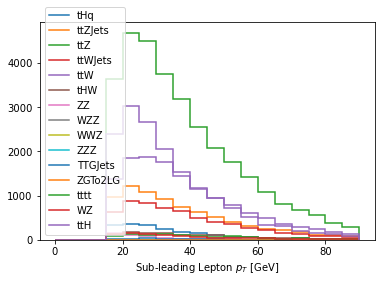

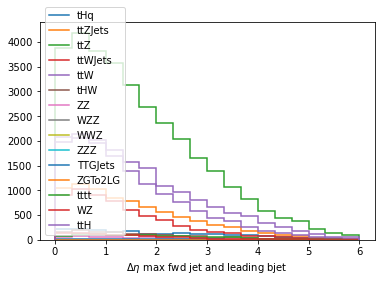

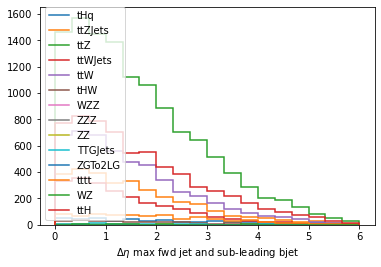

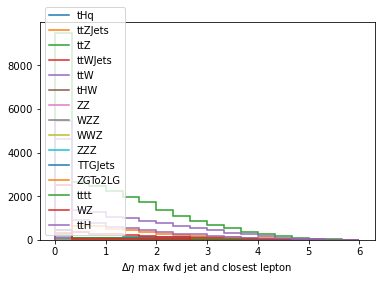

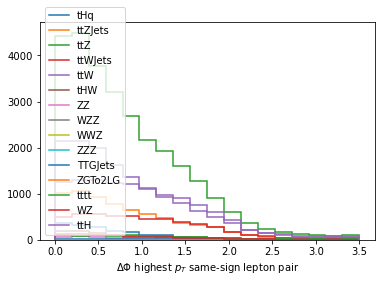

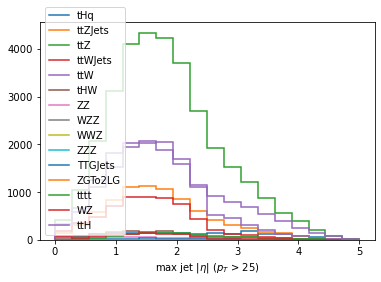

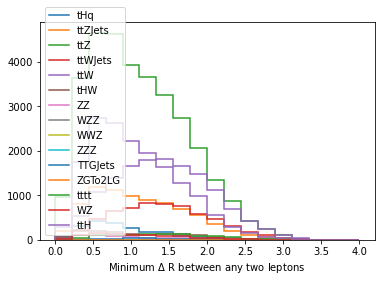

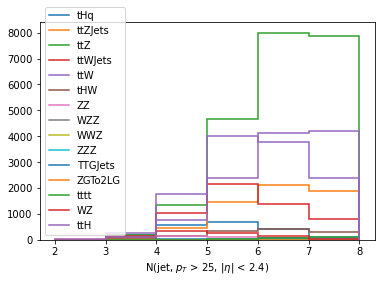

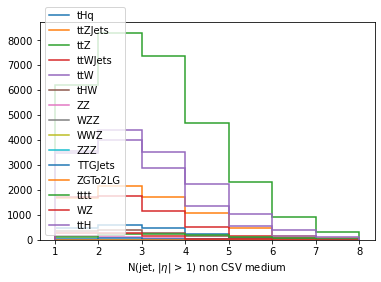

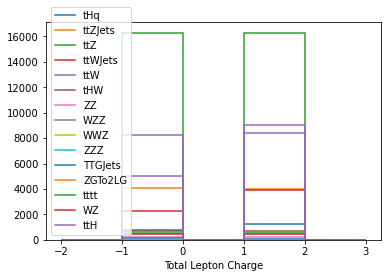

In [7]:
plot_hists(output, 'lll')

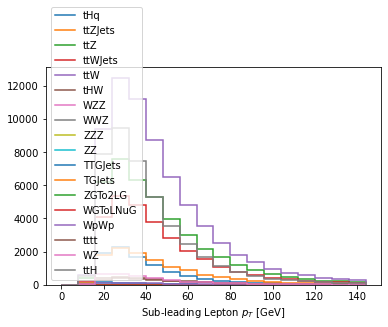

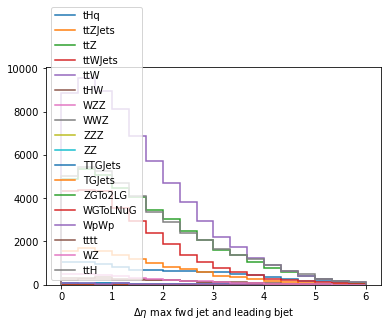

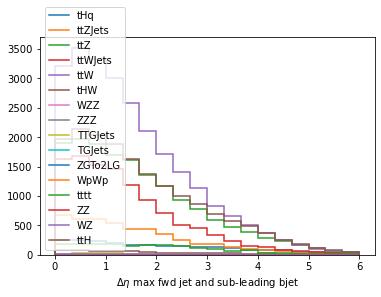

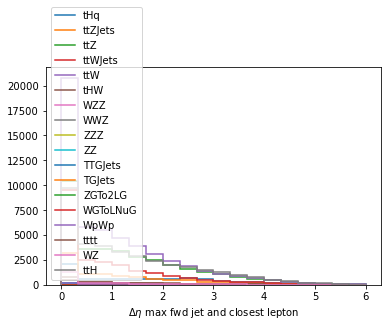

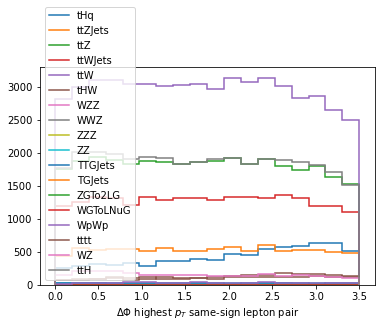

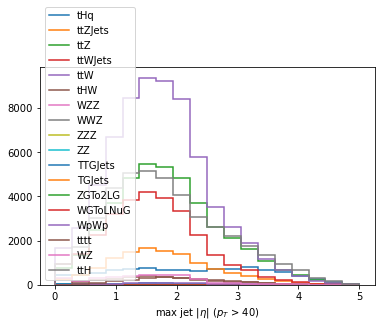

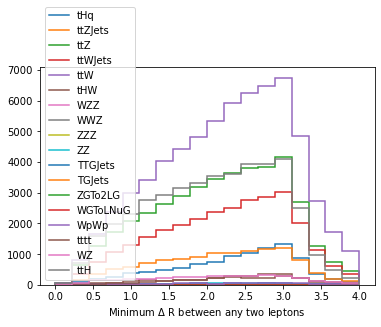

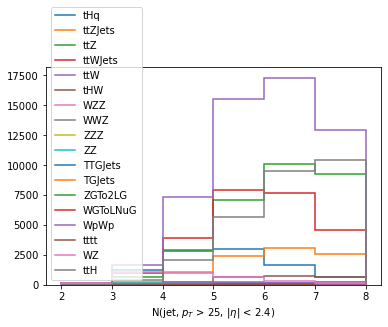

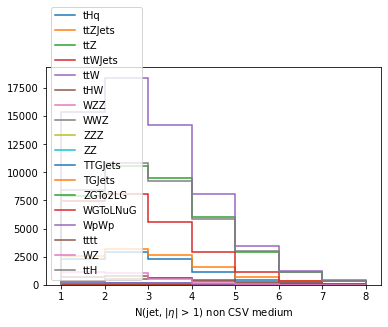

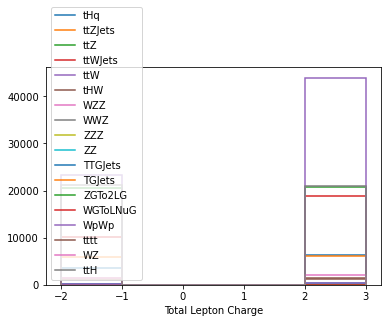

In [8]:
plot_hists(output, 'mumu')

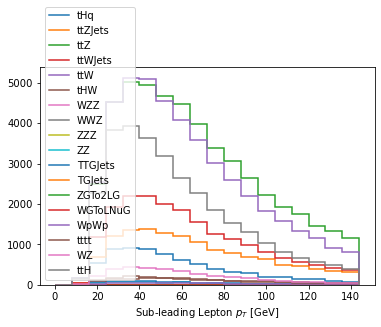

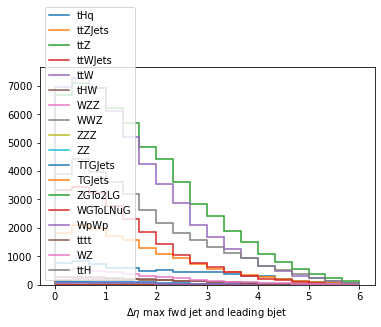

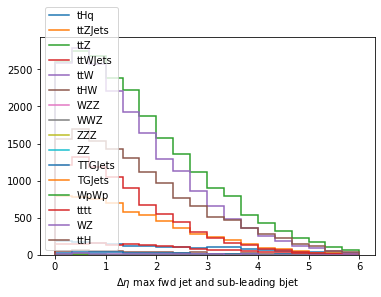

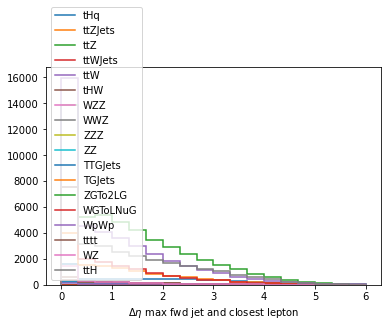

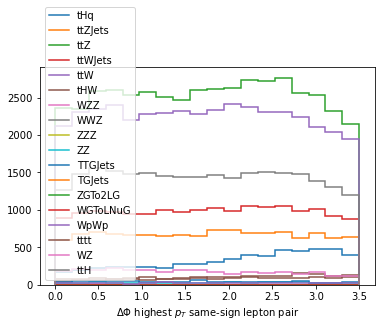

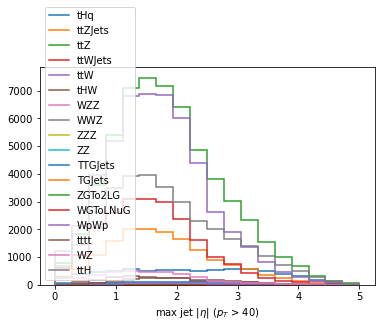

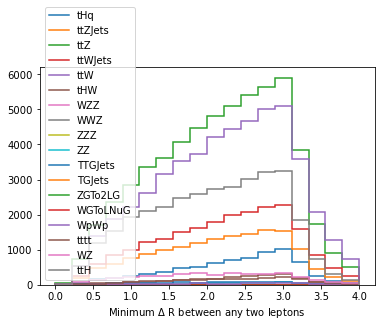

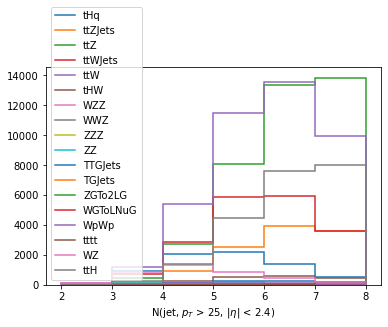

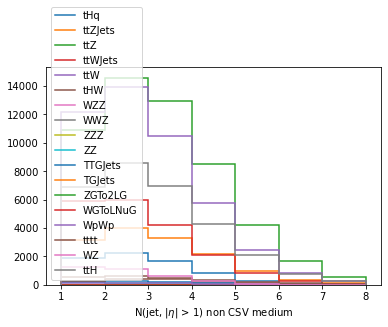

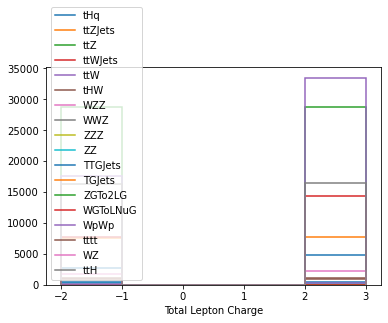

In [9]:
plot_hists(output, 'emu')

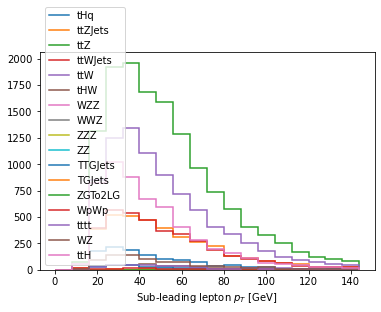

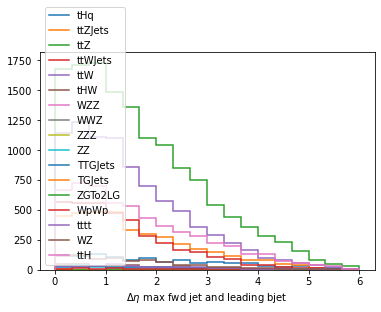

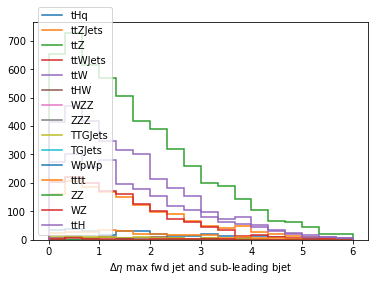

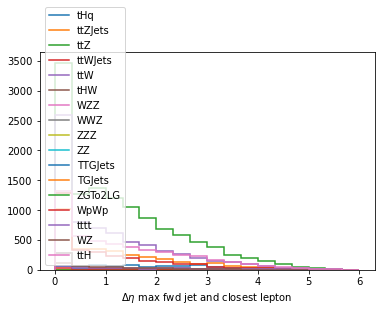

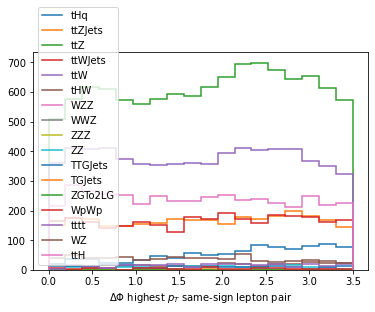

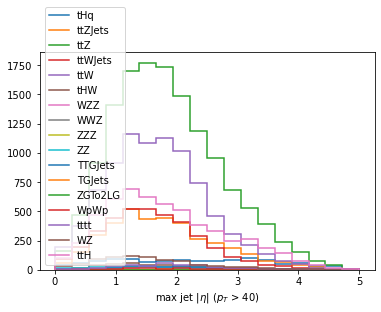

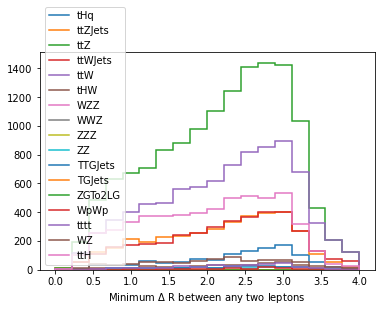

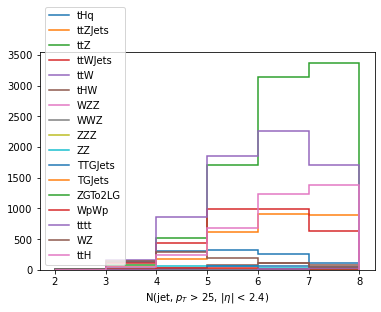

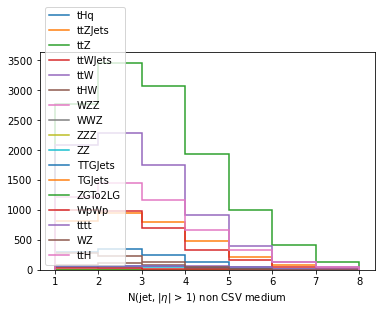

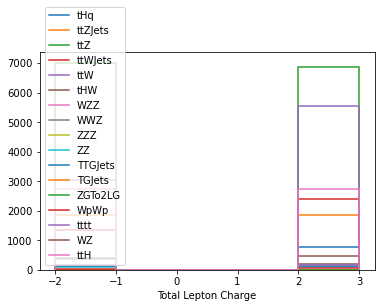

In [10]:
plot_hists(output, 'ee')

In [11]:
for key, value in output['cutflow'].items():
    print(key, value)

all events 116386751
loose muons 49646480
tight muons 32902388
loose electrons 44647259
tight electrons 11280116
jets > 25 556862762
tight_ll 895032
tights_2mu 424230
tights_2e 77476
tights_emu 393326
jets through dilepton mask 3117476
tight_lll 250554
jets through trilepton mask 590194
